# PCA for Feature Extraction, Visualization and Classification

The size of raw face image is 32×32 pixels, resulting in a 1024 dimensional vector for each im- age. Randomly sample 500 images from the CMU PIE training set and your own photos. Apply PCA to reduce the dimensionality of vectorized images to 2 and 3 respectively. Visualize the projected data vector in 2d and 3d plots. Highlight the projected points corresponding to your photo. Also visualize the corresponding 3 eigenfaces used for the dimensionality reduction.
Then apply PCA to reduce the dimensionality of face images to 40, 80 and 200 respectively. Classifying the test images using the rule of nearest neighbor. Report the classification accuracy on the CMU PIE test images and your own photo seperately.

### Read all the images

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits import mplot3d

In [2]:
def read_images():
    dir='PIE'
    PIE=os.listdir(dir)
    all_img = []
    img_folders=[dir+'/' + photo for photo in PIE]
    selected_subjects = np.random.choice(range(len(img_folders)), 20, replace=False)
    
    selected_sub_folders = [img_folders[index] for index in selected_subjects]
    print('Selected Subjects:')
    print(selected_sub_folders)

    for img_dir in selected_sub_folders:
        img_path=os.listdir(img_dir)
        img_dir_index=[img_dir+'/' + photo for photo in img_path]
        all_img.append(img_dir_index)

    flat_list = []
    for sublist in all_img:
        for item in sublist:
            flat_list.append(item)
    
    images = np.array([plt.imread(image) for image in flat_list], dtype=np.int16)
    labels = np.zeros((len(images)))

    print(len(flat_list))
    for i, path in enumerate(flat_list):
        labels[i] = path.split('/')[1]
    return images, labels

In [3]:
images, labels = read_images()
n_samples, image_size, _ = images.shape
n_features = image_size * image_size

Selected Subjects:
['PIE/42', 'PIE/35', 'PIE/67', 'PIE/46', 'PIE/5', 'PIE/39', 'PIE/8', 'PIE/12', 'PIE/56', 'PIE/32', 'PIE/61', 'PIE/51', 'PIE/10', 'PIE/54', 'PIE/9', 'PIE/37', 'PIE/20', 'PIE/49', 'PIE/34', 'PIE/22']
3400


In [4]:
np.unique(labels).shape

(20,)

### Randomly select 500 images

In [5]:
def select_images(images, labels, select_num):
    num_images = len(images)
    np.random.seed(99)
    if select_num == len(images):
        return images.reshape([select_num, n_features]), labels
    rand_images_list = np.random.randint(0, num_images, select_num)
    X = images[rand_images_list].reshape([select_num, n_features])
    y = labels[rand_images_list]
    return X, y

In [6]:
X, y = select_images(images, labels, 500)

### PCA

In [7]:
def PCA(X):
    mean_data = np.mean(X,axis=0)
    centred_data = X - mean_data
    cov_matrix = np.cov(centred_data.T)
    [eig_val,eig_vec] = np.linalg.eig(cov_matrix)
    projected = np.dot(eig_vec, centred_data.T)
    return eig_val, eig_vec

In [8]:
def get_centred_data(X):
    mean_data = np.mean(X,axis=0)
    centred_data = X - mean_data
    return centred_data

In [9]:
def get_reduced_dim_data(eig_vec, X, dim):
    pca_vec = eig_vec[:,0:dim]
    return np.dot(X, pca_vec)

In [10]:
eig_val, eig_vec= PCA(X)

### Eigenfaces

In [11]:
def get_eigenface(eig_vec, i):
    return eig_vec[:,i].real.reshape([image_size,image_size])

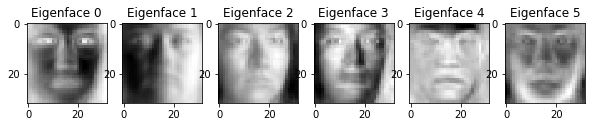

In [12]:
num_eig_faces = 6
fig=plt.figure(figsize=(10, 10))
for i in range(num_eig_faces):
    eig_face = get_eigenface(eig_vec, i)
    ax = fig.add_subplot(1, num_eig_faces, i+1)
    ax.title.set_text('Eigenface '+str(i))
    plt.imshow(eig_face,cmap='gray')
plt.show()

### Visualise 2D and 3D

In [13]:
sorted_eig_index = np.argsort(eig_val)[::-1]

In [14]:
pca_2d_vec = eig_vec[:,sorted_eig_index[0:2]]
pca_3d_vec = eig_vec[:,sorted_eig_index[0:3]]

In [15]:
pca_2d = np.dot(X, pca_2d_vec)
pca_3d = np.dot(X, pca_3d_vec)

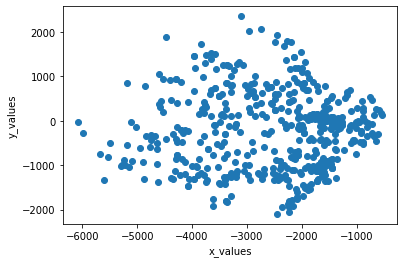

In [16]:
plt.plot(pca_2d[:,0].real, pca_2d[:,1].real, 'o')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.show()

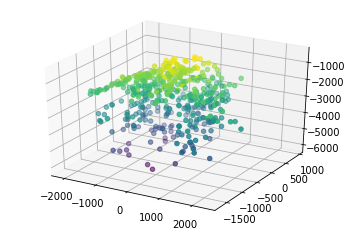

In [17]:
ax = plt.axes(projection='3d')

zdata = pca_3d[:,0].real
xdata = pca_3d[:,1].real
ydata = pca_3d[:,2].real
ax.scatter3D(xdata, ydata, zdata, c=zdata);

### Classifying the test images using the rule of nearest neighbor

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [19]:
X, y = select_images(images, labels, n_samples)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
dimensions = [40,80,200]

In [22]:
for dim in dimensions:
    # reduce the dimensionality of training data
    eig_val, eig_vec = PCA(X_train)
    centred_data = get_centred_data(X_train)
    X_pca_train = get_reduced_dim_data(eig_vec, centred_data, dim).real

    # reduce the dimensionality of test data
    centred_data = get_centred_data(X_test)
    X_pca_test = get_reduced_dim_data(eig_vec, centred_data, dim).real

    # Create KNN classifier
    knn = KNeighborsClassifier(n_neighbors = 1)
    # Fit the classifier to the data
    knn.fit(X_pca_train, y_train)
    y_pred = knn.predict(X_pca_test)
    score = knn.score(X_pca_test, y_test)
    print(score)

0.9352941176470588
0.9470588235294117
0.9637254901960784
